In [1]:

# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt
import warnings
warnings.filterwarnings("ignore")


In [2]:

# get data of electricity_consumption from a .csv-file:
df01 = pd.read_csv("Toronto-Subway-Delay-Jan-2014-Jun-2021.csv")


In [3]:

df01


,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2,2014/01/01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
3,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386
...,...,...,...,...,...,...,...,...,...,...
143912,2021/06/30,01:23,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0
143913,2021/06/30,06:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0
143914,2021/06/30,12:40,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0
143915,2021/06/30,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171


In [4]:

# check duplicates:
df01[["Date","Time"]].value_counts().head(20)


Date        Time 
2020/11/01  19:30    8
2021/06/22  06:00    6
2019/10/29  06:00    6
2014/08/05  05:11    6
2016/10/25  06:00    6
2019/12/30  06:00    6
2020/02/10  06:00    6
2014/09/26  06:00    6
2020/12/31  06:00    6
2020/10/19  06:00    6
2015/01/08  02:30    5
2017/10/10  06:00    5
2016/10/16  07:25    4
2015/01/31  06:00    4
2018/08/12  04:00    4
2018/08/11  04:00    4
2021/04/27  06:00    4
2016/06/28  06:00    4
2020/11/01  08:00    4
2019/07/21  08:00    4
Name: count, dtype: int64

In [5]:

# check duplicates in detail
df01[(df01["Date"] == "2020/11/01") & ( df01["Time"] == "19:30")]


,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
134161,2020/11/01,19:30,Sunday,VAUGHAN MC STATION,TUNOA,5,10,NaN,YU,0
134162,2020/11/01,19:30,Sunday,VAUGHAN MC STATION,TUNOA,5,10,NaN,YU,0
134163,2020/11/01,19:30,Sunday,VAUGHAN MC STATION,TUNOA,5,10,NaN,YU,0
134164,2020/11/01,19:30,Sunday,VAUGHAN MC STATION,TUNOA,5,10,NaN,YU,0
134165,2020/11/01,19:30,Sunday,VAUGHAN MC STATION,TUNOA,5,10,NaN,YU,0
134166,2020/11/01,19:30,Sunday,VAUGHAN MC STATION,TUNOA,5,10,NaN,YU,0
134167,2020/11/01,19:30,Sunday,VAUGHAN MC STATION,TUNOA,5,10,0,YU,0
134168,2020/11/01,19:30,Sunday,VAUGHAN MC STATION,TUNOA,5,10,NaN,YU,0


In [6]:

# delete all duplicates of df01
df01.drop_duplicates(inplace=True,keep=False)


In [7]:

# check if it worked
df01[(df01["Date"] == "2020/11/01") & ( df01["Time"] == "19:30")]


,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
134167,2020/11/01,19:30,Sunday,VAUGHAN MC STATION,TUNOA,5,10,0,YU,0


In [8]:

# check the rest
df01[["Date","Time"]].value_counts().head(20)


Date        Time 
2014/08/05  05:11    6
2015/01/08  02:30    5
2021/04/28  06:00    4
2015/01/31  06:00    4
2018/08/12  04:00    4
2015/09/03  06:00    4
2014/02/21  06:00    4
2016/04/28  06:00    4
2015/10/05  06:00    4
2020/04/08  06:00    4
2021/05/21  14:56    4
2019/02/18  06:00    4
2018/07/23  06:00    4
2016/06/28  06:00    4
2020/03/30  06:00    4
2014/11/11  11:00    4
2021/05/26  06:00    4
2015/07/29  06:00    4
2017/09/09  06:00    4
2020/11/01  08:00    4
Name: count, dtype: int64

In [9]:

# check the rest of duplicates in detail --> different cases, everything o.k.
df01[(df01["Date"] == "2014/08/05") & ( df01["Time"] == "05:11")]


,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
12148,2014/08/05,05:11,Tuesday,DONLANDS STATION,MUO,3,6,W,BD,5053
12149,2014/08/05,05:11,Tuesday,GREENWOOD STATION,MUO,5,10,E,BD,5334
12150,2014/08/05,05:11,Tuesday,GREENWOOD STATION,MUO,0,0,E,BD,5031
12151,2014/08/05,05:11,Tuesday,GREENWOOD STATION,MUO,5,10,E,BD,5004
12152,2014/08/05,05:11,Tuesday,GREENWOOD STATION,MUO,3,6,E,BD,5336
12153,2014/08/05,05:11,Tuesday,ST CLAIR WEST STATION,PUMO,340,343,N,YU,5631


In [10]:

# check the indices --> they are not consecutive
df01.index


Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       143907, 143908, 143909, 143910, 143911, 143912, 143913, 143914, 143915,
       143916],
      dtype='int64', length=143625)

In [11]:

# create new and correct indices
# --> useable dataframe for working with time series
df01.reset_index(drop=True,inplace=True)


In [12]:

#the features i need with correct indices
df02 = df01[["Date","Time","Day","Min Delay","Min Gap"]]


In [13]:
df02

,Date,Time,Day,Min Delay,Min Gap
0,2014/01/01,00:21,Wednesday,55,60
1,2014/01/01,02:06,Wednesday,3,7
2,2014/01/01,02:40,Wednesday,0,0
3,2014/01/01,03:10,Wednesday,3,8
4,2014/01/01,03:20,Wednesday,5,10
...,...,...,...,...,...
143620,2021/06/30,01:23,Wednesday,0,0
143621,2021/06/30,06:00,Wednesday,0,0
143622,2021/06/30,12:40,Wednesday,0,0
143623,2021/06/30,20:50,Wednesday,9,14


In [14]:

df02.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143625 entries, 0 to 143624
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       143625 non-null  object
 1   Time       143625 non-null  object
 2   Day        143625 non-null  object
 3   Min Delay  143625 non-null  int64 
 4   Min Gap    143625 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 5.5+ MB


In [15]:

# no null-values to control:
df02.isnull().sum()


Date         0
Time         0
Day          0
Min Delay    0
Min Gap      0
dtype: int64

In [16]:
df02.shape

(143625, 5)

In [17]:

# get the data for one year --> 2014:
list_2014 = []
for i in df02.Date:
    if "2014" in i:
        list_2014.append(i)
        
len(list_2014)


20402

In [18]:

# select only a part of the data set to analyze:
df03 = df02.iloc[:(len(list_2014)),:]


In [19]:

df03


,Date,Time,Day,Min Delay,Min Gap
0,2014/01/01,00:21,Wednesday,55,60
1,2014/01/01,02:06,Wednesday,3,7
2,2014/01/01,02:40,Wednesday,0,0
3,2014/01/01,03:10,Wednesday,3,8
4,2014/01/01,03:20,Wednesday,5,10
...,...,...,...,...,...
20397,2014/12/31,23:24,Wednesday,4,8
20398,2014/12/31,23:25,Wednesday,0,0
20399,2014/12/31,23:29,Wednesday,0,0
20400,2014/12/31,23:37,Wednesday,0,0


In [20]:

# create a list with "cleaned strings" (--> library 're') in it,
# and put them together for a new feature DateTime
list_DateTime = []
for i in df03.index:
    list_DateTime.append(((re.sub("/","",df03.Date[i])) + (re.sub(":","",df03.Time[i])) + "00"))


In [21]:
len(list_DateTime)

20402

In [22]:

# create the feature
df03["DateTime"] = list_DateTime


In [23]:
df03

,Date,Time,Day,Min Delay,Min Gap,DateTime
0,2014/01/01,00:21,Wednesday,55,60,20140101002100
1,2014/01/01,02:06,Wednesday,3,7,20140101020600
2,2014/01/01,02:40,Wednesday,0,0,20140101024000
3,2014/01/01,03:10,Wednesday,3,8,20140101031000
4,2014/01/01,03:20,Wednesday,5,10,20140101032000
...,...,...,...,...,...,...
20397,2014/12/31,23:24,Wednesday,4,8,20141231232400
20398,2014/12/31,23:25,Wednesday,0,0,20141231232500
20399,2014/12/31,23:29,Wednesday,0,0,20141231232900
20400,2014/12/31,23:37,Wednesday,0,0,20141231233700


In [24]:
df03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20402 entries, 0 to 20401
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       20402 non-null  object
 1   Time       20402 non-null  object
 2   Day        20402 non-null  object
 3   Min Delay  20402 non-null  int64 
 4   Min Gap    20402 non-null  int64 
 5   DateTime   20402 non-null  object
dtypes: int64(2), object(4)
memory usage: 956.5+ KB


In [25]:

# convert to an date-format:
df03.DateTime = pd.to_datetime(df03.DateTime,format='%Y%m%d%H%M%S')


In [26]:
df03

,Date,Time,Day,Min Delay,Min Gap,DateTime
0,2014/01/01,00:21,Wednesday,55,60,2014-01-01 00:21:00
1,2014/01/01,02:06,Wednesday,3,7,2014-01-01 02:06:00
2,2014/01/01,02:40,Wednesday,0,0,2014-01-01 02:40:00
3,2014/01/01,03:10,Wednesday,3,8,2014-01-01 03:10:00
4,2014/01/01,03:20,Wednesday,5,10,2014-01-01 03:20:00
...,...,...,...,...,...,...
20397,2014/12/31,23:24,Wednesday,4,8,2014-12-31 23:24:00
20398,2014/12/31,23:25,Wednesday,0,0,2014-12-31 23:25:00
20399,2014/12/31,23:29,Wednesday,0,0,2014-12-31 23:29:00
20400,2014/12/31,23:37,Wednesday,0,0,2014-12-31 23:37:00


In [27]:
df04 = df03.iloc[:,3:6]

In [28]:
df04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20402 entries, 0 to 20401
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Min Delay  20402 non-null  int64         
 1   Min Gap    20402 non-null  int64         
 2   DateTime   20402 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 478.3 KB


Text(0.5, 0, 'Date')

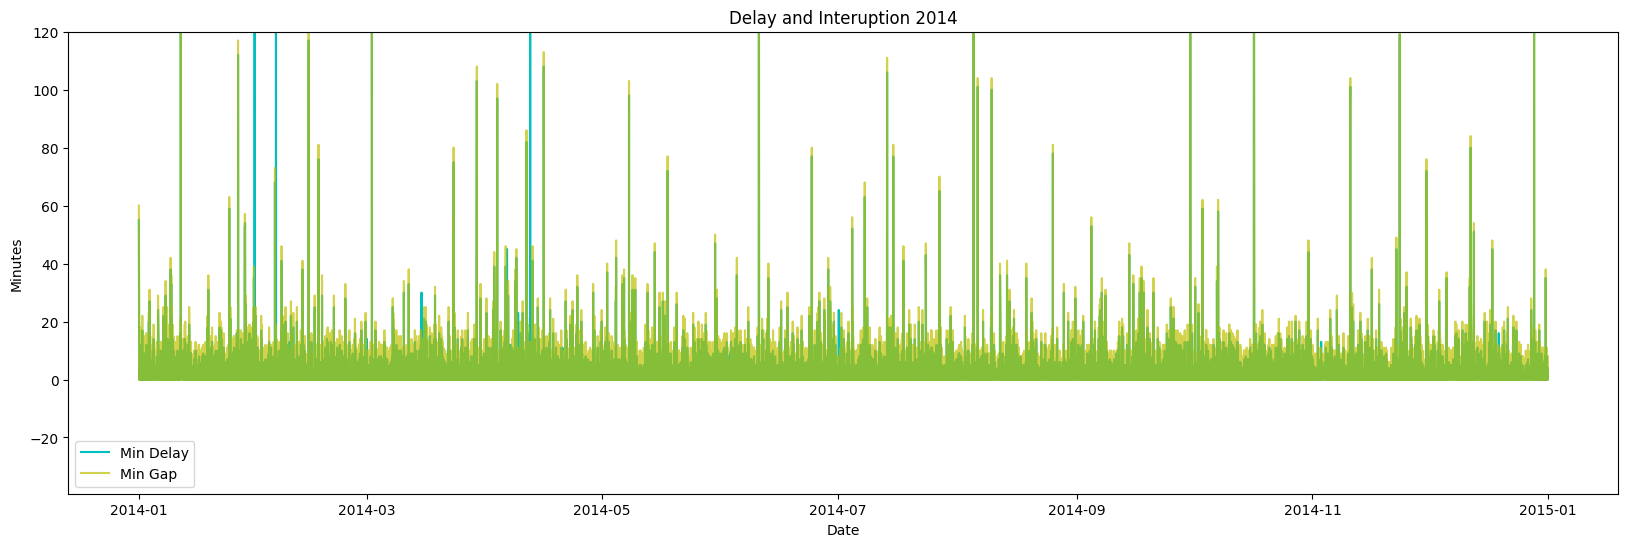

In [29]:

# visualization:
plt.figure(figsize=(20,6))
plt.plot(df04.DateTime,df04["Min Delay"],"c",alpha=1)
plt.plot(df04.DateTime,df04["Min Gap"],"y",alpha=0.7)
plt.title("Delay and Interuption 2014")
plt.legend(['Min Delay','Min Gap'])
plt.ylim(top=120)
plt.ylabel("Minutes")
plt.xlabel("Date")


In [30]:

# analysis of the hours --> create a feature "TimesInHours"
df04['TimesInHours'] = df04.DateTime.dt.hour


In [31]:

df04.sample(5)


,Min Delay,Min Gap,DateTime,TimesInHours
4929,4,8,2014-03-20 09:20:00,9
1056,0,0,2014-01-20 12:40:00,12
12066,0,0,2014-08-03 12:49:00,12
13779,0,0,2014-09-02 23:15:00,23
9461,0,0,2014-06-15 22:00:00,22


In [32]:

# Delay and Interuption --> average values by hour
df04byHour = df04.groupby('TimesInHours').mean()


In [33]:

df04byHour


,Min Delay,Min Gap,DateTime
TimesInHours,,,
0,2.840336,4.327731,2014-06-29 17:00:29.445378048
1,2.006565,3.135667,2014-07-09 16:51:42.407002112
2,0.343891,0.180995,2014-06-06 07:21:09.230769152
3,0.150943,0.339623,2014-06-27 08:47:12.452830208
4,0.116667,0.000000,2014-07-18 14:59:54.000000000
5,2.446319,2.527607,2014-06-15 02:47:38.742331136
6,2.283242,3.546448,2014-06-16 20:12:03.661202176
7,2.443137,3.728431,2014-06-16 16:39:41.705882368
8,1.813887,2.773085,2014-06-30 13:20:00.773085184


Text(0.5, 0, 'TimesInHours')

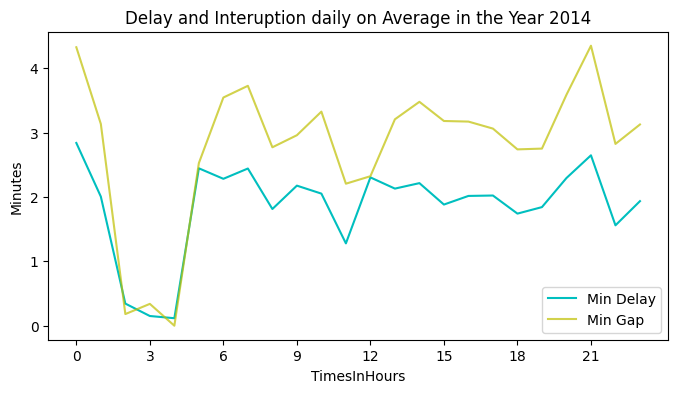

In [34]:

# visualization:
plt.figure(figsize=(8,4))
plt.plot(df04byHour.index,df04byHour["Min Delay"],"c",alpha=1)
plt.plot(df04byHour.index,df04byHour["Min Gap"],"y",alpha=0.7)
plt.title("Delay and Interuption daily on Average in the Year 2014")
plt.xticks(np.arange(0, 24, step=3))
plt.legend(['Min Delay','Min Gap'])
plt.ylabel("Minutes")
plt.xlabel("TimesInHours")


In [35]:
df04.head(5)

,Min Delay,Min Gap,DateTime,TimesInHours
0,55,60,2014-01-01 00:21:00,0
1,3,7,2014-01-01 02:06:00,2
2,0,0,2014-01-01 02:40:00,2
3,3,8,2014-01-01 03:10:00,3
4,5,10,2014-01-01 03:20:00,3


In [36]:

# delete the feature to use the mean values of the week afterwards
df04.drop(columns="TimesInHours",inplace=True)


In [37]:

# analysis of the weekdays --> create a feature "WeekDay"
df04['WeekDay'] = df04.DateTime.dt.day_name()


In [38]:

df04.sample(5)


,Min Delay,Min Gap,DateTime,WeekDay
18010,0,0,2014-11-18 08:42:00,Tuesday
15685,3,6,2014-10-06 20:49:00,Monday
19310,0,0,2014-12-11 07:38:00,Thursday
17513,0,0,2014-11-09 09:31:00,Sunday
8598,0,0,2014-05-28 17:44:00,Wednesday


In [39]:

# Delay and Interuption --> average values by weekday
df04byDay = df04.groupby('WeekDay').mean()


In [40]:

# create the column "WeekDay" before setting the multiindex
df04byDay["WeekDay"] = df04byDay.index


In [41]:
df04byDay

,Min Delay,Min Gap,DateTime,WeekDay
WeekDay,,,,
Friday,1.870134,2.889761,2014-06-30 00:12:24.789008896,Friday
Monday,1.666035,2.709637,2014-06-26 13:55:22.654028288,Monday
Saturday,2.076728,3.215852,2014-07-04 00:52:36.121416448,Saturday
Sunday,2.245486,3.403123,2014-07-01 09:24:15.021961984,Sunday
Thursday,2.023715,3.108848,2014-06-24 13:12:57.500760064,Thursday
Tuesday,2.272180,3.356464,2014-06-29 22:17:52.015209216,Tuesday
Wednesday,2.057031,2.875679,2014-06-29 06:18:37.875678976,Wednesday


In [42]:

# --> set a multiindex with the right order of the days:
df04byDay.set_index(keys=[pd.Index([4,0,5,6,3,1,2]), "WeekDay"],inplace=True)


In [43]:

# sorting the new order:
df04byDay.sort_index(inplace=True)


In [44]:
df04byDay

,,Min Delay,Min Gap,DateTime
,WeekDay,,,
0,Monday,1.666035,2.709637,2014-06-26 13:55:22.654028288
1,Tuesday,2.272180,3.356464,2014-06-29 22:17:52.015209216
2,Wednesday,2.057031,2.875679,2014-06-29 06:18:37.875678976
3,Thursday,2.023715,3.108848,2014-06-24 13:12:57.500760064
4,Friday,1.870134,2.889761,2014-06-30 00:12:24.789008896
5,Saturday,2.076728,3.215852,2014-07-04 00:52:36.121416448
6,Sunday,2.245486,3.403123,2014-07-01 09:24:15.021961984


In [45]:

# i need the second value of the multiindex-tuple:
df04byDay.index.get_level_values(1)


Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name='WeekDay')

Text(0.5, 0, 'Weekdays')

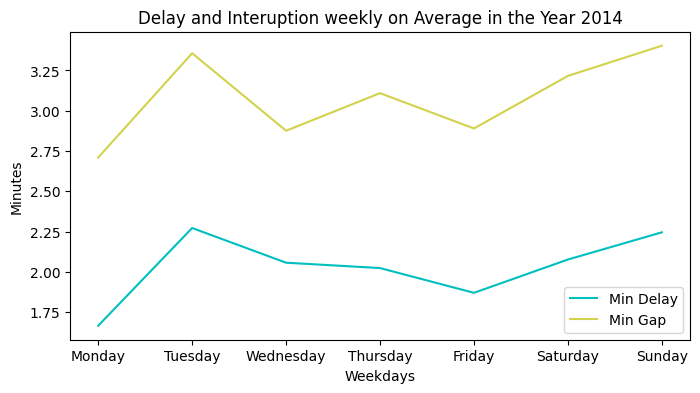

In [46]:

# visualization:
plt.figure(figsize=(8,4))
plt.plot(df04byDay.index.get_level_values(1),df04byDay["Min Delay"],"c",alpha=1)
plt.plot(df04byDay.index.get_level_values(1),df04byDay["Min Gap"],"y",alpha=0.7)
plt.title("Delay and Interuption weekly on Average in the Year 2014")
plt.legend(['Min Delay','Min Gap'])
plt.ylabel("Minutes")
plt.xlabel("Weekdays")


In [47]:

# analysis of the months --> create a feature "Month"
df04['Month'] = df04.DateTime.dt.month_name()


In [48]:

# delete the feature to use the mean values of the months afterwards
df04.drop(columns="WeekDay",inplace=True)


In [49]:
df04.Month.value_counts()

Month
February     1881
March        1877
January      1783
October      1769
August       1709
December     1679
September    1670
July         1645
November     1620
April        1616
May          1597
June         1556
Name: count, dtype: int64

In [50]:
df04.sample(10)

,Min Delay,Min Gap,DateTime,Month
10726,0,0,2014-07-09 16:37:00,July
5048,0,0,2014-03-22 14:49:00,March
3482,5,10,2014-02-26 06:33:00,February
425,3,8,2014-01-08 14:49:00,January
15374,0,0,2014-10-01 19:22:00,October
10225,0,0,2014-06-29 18:56:00,June
10211,0,0,2014-06-29 13:28:00,June
9228,0,0,2014-06-11 06:56:00,June
11294,0,0,2014-07-19 21:08:00,July
12296,0,0,2014-08-07 18:08:00,August


In [51]:

# Delay and Interuption --> average values by month
df04byMonth = df04.groupby('Month').mean()


In [52]:

# create the column "Month" before setting the multiindex
df04byMonth["Month"] = df04byMonth.index


In [53]:
df04byMonth

,Min Delay,Min Gap,DateTime,Month
Month,,,,
April,2.208540,3.242574,2014-04-15 12:10:39.282178304,April
August,1.820363,2.643651,2014-08-16 15:56:28.648332288,August
December,1.672424,2.522930,2014-12-16 00:15:47.599761664,December
February,2.373737,3.295587,2014-02-15 01:30:30.366825984,February
January,2.572630,3.932698,2014-01-16 22:33:35.266405120,January
July,1.946505,3.213982,2014-07-17 02:35:43.732522752,July
June,1.949871,3.126607,2014-06-16 19:06:14.383033344,June
March,1.911561,3.141183,2014-03-15 18:06:07.448055552,March
May,1.914214,3.018159,2014-05-16 08:03:07.401377536,May


In [54]:

# --> set a multiindex with the right order of the months:
df04byMonth.set_index(keys=[pd.Index([3,7,11,1,0,6,5,2,4,10,9,8]), "Month"],inplace=True)


In [55]:

# sorting the new order:
df04byMonth.sort_index(inplace=True)


In [56]:
df04byMonth

,,Min Delay,Min Gap,DateTime
,Month,,,
0,January,2.572630,3.932698,2014-01-16 22:33:35.266405120
1,February,2.373737,3.295587,2014-02-15 01:30:30.366825984
2,March,1.911561,3.141183,2014-03-15 18:06:07.448055552
3,April,2.208540,3.242574,2014-04-15 12:10:39.282178304
4,May,1.914214,3.018159,2014-05-16 08:03:07.401377536
5,June,1.949871,3.126607,2014-06-16 19:06:14.383033344
6,July,1.946505,3.213982,2014-07-17 02:35:43.732522752
7,August,1.820363,2.643651,2014-08-16 15:56:28.648332288
8,September,1.988024,2.873054,2014-09-15 12:40:21.413173760


In [57]:

# i need the second value of the multiindex-tuple:
df04byMonth.index.get_level_values(1)


Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Month')

Text(0.5, 0, '2014')

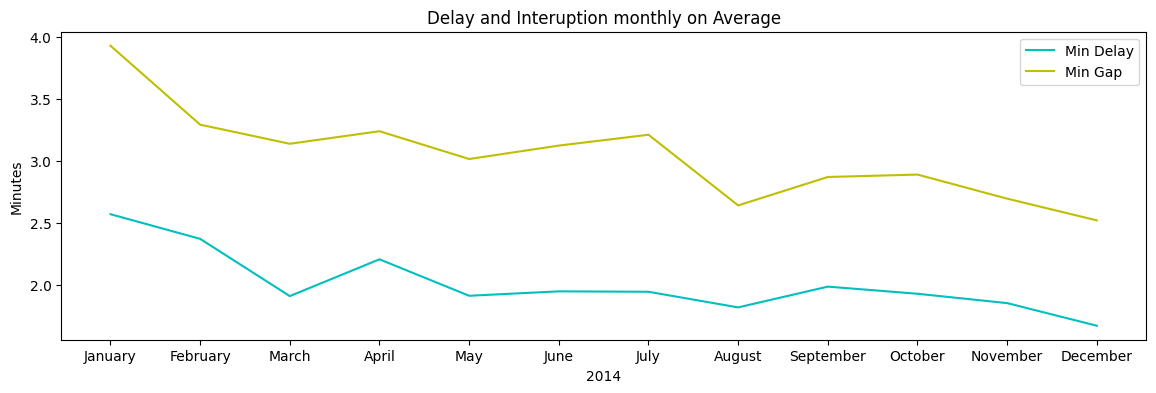

In [58]:

# visualization:
plt.figure(figsize=(14,4))
plt.plot(df04byMonth.index.get_level_values(1),df04byMonth["Min Delay"],"c",alpha=1)
plt.plot(df04byMonth.index.get_level_values(1),df04byMonth["Min Gap"],"y",alpha=1)
plt.title("Delay and Interuption monthly on Average")
plt.legend(['Min Delay','Min Gap'])
plt.ylabel("Minutes")
plt.xlabel("2014")


In [59]:

# data over all years of the data set:
df05 = df02[["Date","Min Delay","Min Gap"]]


In [60]:
df05

,Date,Min Delay,Min Gap
0,2014/01/01,55,60
1,2014/01/01,3,7
2,2014/01/01,0,0
3,2014/01/01,3,8
4,2014/01/01,5,10
...,...,...,...
143620,2021/06/30,0,0
143621,2021/06/30,0,0
143622,2021/06/30,0,0
143623,2021/06/30,9,14


In [61]:

# convert to an date-format:
df05.Date = pd.to_datetime(df05.Date)


In [62]:

df05.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143625 entries, 0 to 143624
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       143625 non-null  datetime64[ns]
 1   Min Delay  143625 non-null  int64         
 2   Min Gap    143625 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.3 MB


Text(0.5, 0, 'Years')

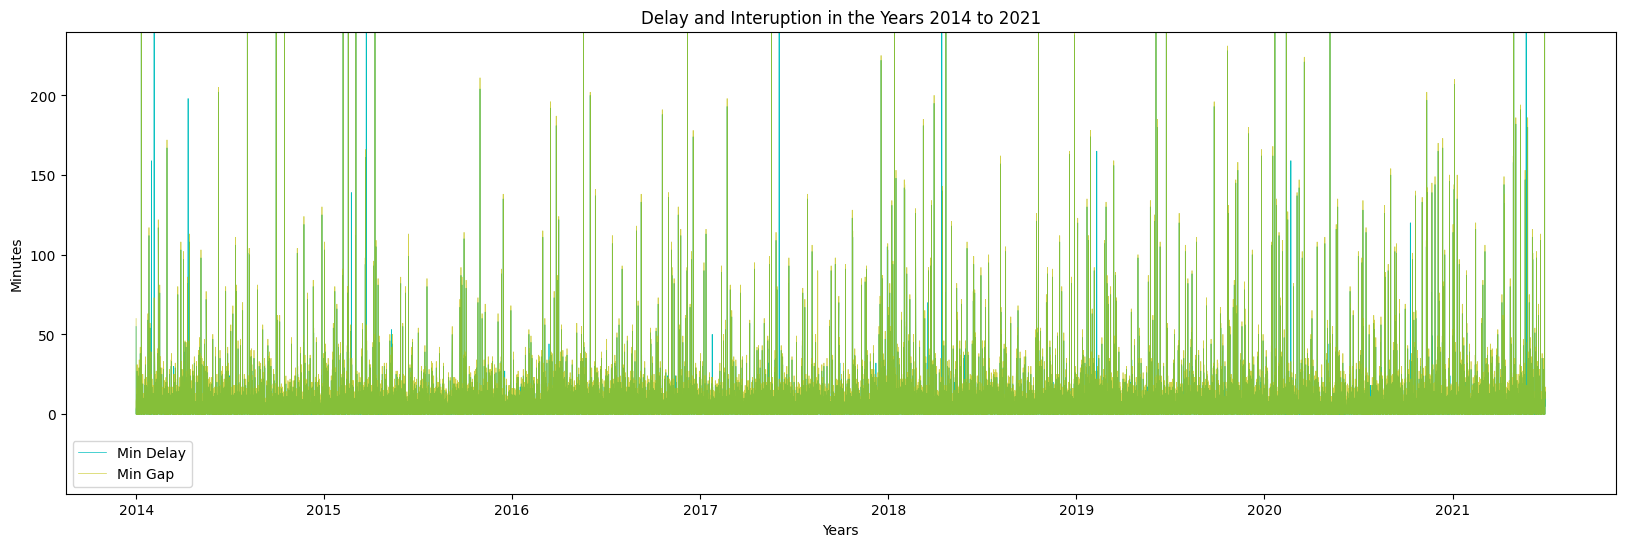

In [63]:

# visualization:
plt.figure(figsize=(20,6))
plt.plot(df05.Date,df05["Min Delay"],"c",linewidth=0.5,alpha=1)
plt.plot(df05.Date,df05["Min Gap"],"y",linewidth=0.5,alpha=0.7)
plt.title("Delay and Interuption in the Years 2014 to 2021")
plt.legend(['Min Delay','Min Gap'])
plt.ylim(top=240)
plt.ylabel("Minutes")
plt.xlabel("Years")


In [64]:

# analysis of the years --> create a feature "Year"
df05['Year'] = df05.Date.dt.year


In [65]:
df05

,Date,Min Delay,Min Gap,Year
0,2014-01-01,55,60,2014
1,2014-01-01,3,7,2014
2,2014-01-01,0,0,2014
3,2014-01-01,3,8,2014
4,2014-01-01,5,10,2014
...,...,...,...,...
143620,2021-06-30,0,0,2021
143621,2021-06-30,0,0,2021
143622,2021-06-30,0,0,2021
143623,2021-06-30,9,14,2021


In [66]:

# Delay and Interuption --> average values by year
df05byYear = df05.groupby('Year').mean()


In [67]:
df05byYear

,Date,Min Delay,Min Gap
Year,,,
2014,2014-06-28 12:11:09.110871552,2.017498,3.056514
2015,2015-07-01 00:06:54.687791104,1.653914,2.371668
2016,2016-07-05 06:18:22.874432768,1.809522,2.648449
2017,2017-07-06 15:00:26.321924352,1.937798,2.844018
2018,2018-07-01 19:51:51.216261888,2.329970,3.421515
2019,2019-06-28 12:31:57.079311872,2.347094,3.468789
2020,2020-06-27 00:02:32.391289344,3.153721,4.752663
2021,2021-03-31 20:32:00.398836736,3.278355,5.025066


Text(0.5, 0, 'Years')

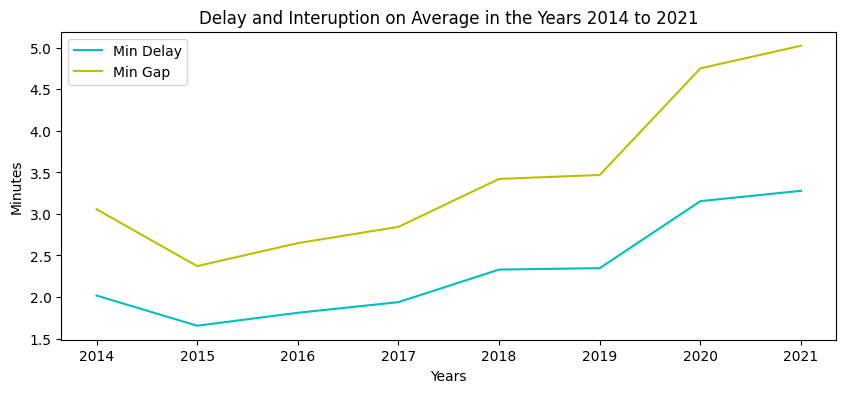

In [68]:

# visualization:
plt.figure(figsize=(10,4))
plt.plot(df05byYear.index,df05byYear['Min Delay'],"c")
plt.plot(df05byYear.index,df05byYear['Min Gap'],"y")
plt.title("Delay and Interuption on Average in the Years 2014 to 2021")
plt.legend(['Min Delay','Min Gap'])
plt.ylabel("Minutes")
plt.xlabel("Years")
